In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)


In [3]:
df=pd.read_csv("avocado.csv.zip")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [5]:
df.shape

(18249, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There is no null value in this dataset

In [8]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [9]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# Preprocessing

In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Earlier in info we have seen that Date is Object type not the data type.We have to change its type to data type

In [12]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [13]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


# EDA

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

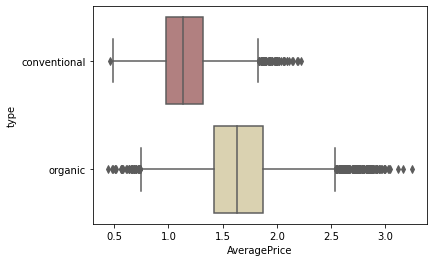

In [14]:
sns.boxplot(y="type", x="AveragePrice",data=df, palette="pink")

From the above boxplot we can say that Organic fruit price is more as compared to conventional fruit.

In [15]:
label=LabelEncoder()
dicts={}
label.fit(df.type.drop_duplicates())
dicts['type']=list(label.classes_)
df.type=label.transform(df.type)

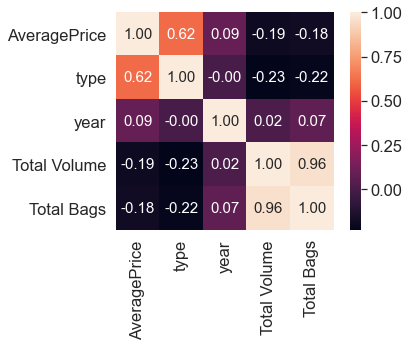

In [16]:
cols=['AveragePrice','type','year','Total Volume','Total Bags']
cm=np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

We can see there is a strong relation between TotalBags and TotalVolume ie, 0.96 and also Type and AveragePrice ie, 0.62.

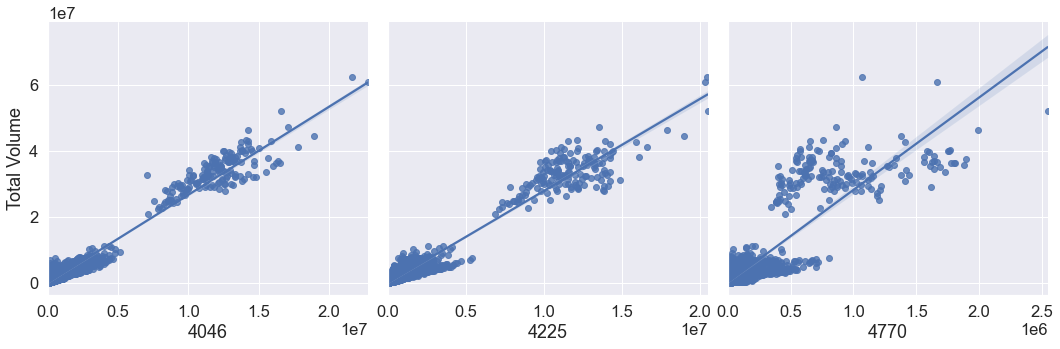

In [16]:
sns.pairplot(df, x_vars=['4046','4225','4770'],y_vars='Total Volume',size=5,aspect=1,kind='reg')

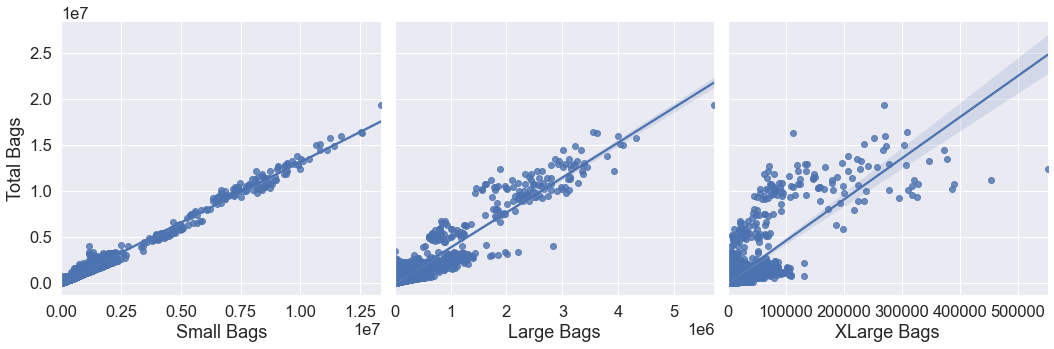

In [17]:
sns.pairplot(df, x_vars=['Small Bags','Large Bags','XLarge Bags'],y_vars='Total Bags',size=5,aspect=1,kind='reg')

There is a strong co-relation between TotalVolume Vs 4046 and TotalBags Vs SmallBags.

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

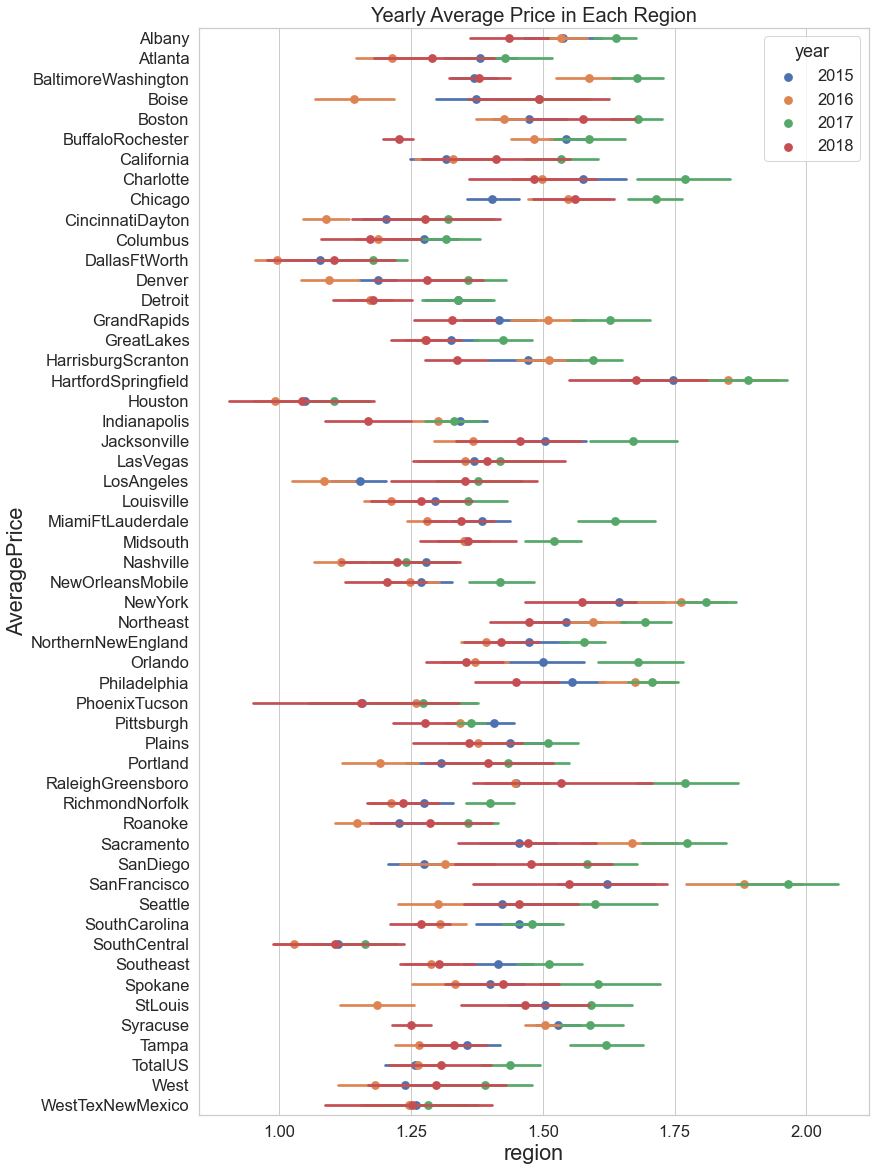

In [18]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=df,hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('region',{'fontsize':'large'})
plt.ylabel('AveragePrice',{'fontsize': 'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})


 Region Vs AveragePrice distribution
From the graph we can say that Organic Type Avocado prices are high in HartfordSpringfield and Sanfrancisco region.

# Finding Outlier and skewness

In [18]:
df.skew()

AveragePrice     0.580303
4046             8.648220
4225             8.942466
4770            10.159396
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

In [17]:
df.drop(['Date', 'Total Volume', 'Total Bags', 'region', ], axis = 1,inplace = True)

In [20]:
df.columns

Index(['AveragePrice', '4046', '4225', '4770', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'type', 'year', 'Month', 'Day'],
      dtype='object')

In [18]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [19]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [20]:
df

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,12,27
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,12,20
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,12,13
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,12,6
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,2018,2,4
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,2018,1,28
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,2018,1,21
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,2018,1,14


In [38]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.11782446, -0.65742071,  0.35142978, ..., -1.01904715,
        -1.2106467 ,  1.49138301],
       [-0.06432986, -0.77717852,  0.26951276, ..., -1.01904715,
        -1.2106467 ,  1.49138301],
       [-1.29886469, -0.7317763 ,  0.64933326, ..., -1.01904715,
        -1.2106467 ,  1.49138301],
       ...,
       [ 1.18432357, -0.61796649, -0.77889327, ...,  0.98130886,
         1.97870686, -1.64028838],
       [ 1.31329624, -0.54701087, -0.71637127, ...,  0.98130886,
         1.97870686, -1.64028838],
       [ 0.61561867, -0.35967077, -0.79165015, ...,  0.98130886,
         1.97870686, -1.64028838]])

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.11782446, -0.65742071,  0.35142978, ..., -1.01904715,
        -1.21061818,  1.49138301],
       [-0.06432986, -0.77717852,  0.26951276, ..., -1.01904715,
        -1.21061818,  1.49138301],
       [-1.29886469, -0.7317763 ,  0.64933326, ..., -1.01904715,
        -1.21061818,  1.49138301],
       ...,
       [ 1.18432357, -0.61796649, -0.77889327, ...,  0.98130886,
         1.97873539, -1.64028838],
       [ 1.31329624, -0.54701087, -0.71637127, ...,  0.98130886,
         1.97873539, -1.64028838],
       [ 0.61561867, -0.35967077, -0.79165015, ...,  0.98130886,
         1.97873539, -1.64028838]])

In [32]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(18249, 11)

In [33]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([1, 1, 6, ..., 0, 0, 0], dtype=int64))


In [34]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,12,27
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,12,20
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,12,13
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,12,6
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,2018,2,4
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,2018,1,28
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,2018,1,21
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,2018,1,14


In [35]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(18249, 11)
(17651, 11)


In [36]:
loss_percent=((18249-17651)/18249)*100
print(loss_percent)

3.276891884486821


In [37]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [22]:
x=df.drop("AveragePrice",axis=1)
y=df["AveragePrice"]

In [23]:
x

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,12,27
1,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,12,20
2,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,12,13
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,12,6
4,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...
18244,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,2018,2,4
18245,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,2018,1,28
18246,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,2018,1,21
18247,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,2018,1,14


In [24]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [25]:
x.skew()

4046            8.648220
4225            8.942466
4770           10.159396
Small Bags      9.540660
Large Bags      9.796455
XLarge Bags    13.139751
type            0.000329
year            0.215339
Month           0.106617
Day             0.014310
dtype: float64

In [26]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)


In [27]:
type(x_new)

numpy.ndarray

In [28]:
x.columns

Index(['4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'type', 'year', 'Month', 'Day'],
      dtype='object')

In [29]:
x=pd.DataFrame(x_new,columns=x.columns)
x

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,-0.658619,0.307313,-0.247250,-0.340627,-0.773351,-0.699849,-0.999836,-1.221895,1.494347,1.229285
1,-0.776870,0.231647,-0.201041,-0.306425,-0.763435,-0.699849,-0.999836,-1.221895,1.494347,0.541005
2,-0.731947,0.579503,-0.007072,-0.366303,-0.750820,-0.699849,-0.999836,-1.221895,1.494347,-0.215570
3,-0.634200,0.415100,-0.148322,-0.496853,-0.691865,-0.699849,-0.999836,-1.221895,1.494347,-1.091311
4,-0.685293,0.224806,-0.137918,-0.477201,-0.600975,-0.699849,-0.999836,-1.221895,1.278438,1.416727
...,...,...,...,...,...,...,...,...,...,...
18244,-0.467366,-0.919470,-1.238310,-0.178839,-0.410859,-0.699849,1.000164,1.968548,-1.220706,-1.382073
18245,-0.619883,-0.665372,-1.238310,-0.325977,-0.481465,-0.699849,1.000164,1.968548,-1.642047,1.323455
18246,-0.619831,-0.772496,0.401546,-0.308728,-0.943486,-0.699849,1.000164,1.968548,-1.642047,0.642842
18247,-0.550282,-0.710543,0.401246,-0.248932,-0.908510,-0.699849,1.000164,1.968548,-1.642047,-0.101959


In [30]:
x.skew()

4046          -0.022679
4225          -0.017740
4770           0.032184
Small Bags     0.007058
Large Bags    -0.073809
XLarge Bags    0.793520
type           0.000329
year           0.213156
Month         -0.146584
Day           -0.208462
dtype: float64

In [31]:
sk=x.skew()
sk

4046          -0.022679
4225          -0.017740
4770           0.032184
Small Bags     0.007058
Large Bags    -0.073809
XLarge Bags    0.793520
type           0.000329
year           0.213156
Month         -0.146584
Day           -0.208462
dtype: float64

In [34]:
np.abs(3)

3

In [35]:
sk[np.abs(sk)>0.5].all()

True

# Model Building

In [40]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [41]:
X=df.iloc[:,1:14]
y=df['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [43]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.233008140475446
MSE: 0.09111535726336162
RMSE: 0.30185320482539457


The RMSE is low so we can say that we do have a good model, but lets check to be more sure.
Lets plot the y_test vs the predictions

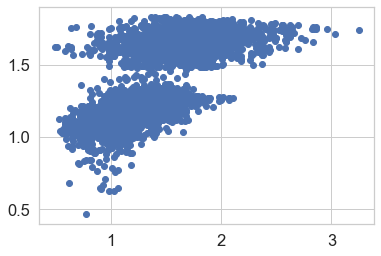

In [46]:
plt.scatter(x=y_test,y=pred)

# DecisionTree Classifier

In [44]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.13563287671232876
MSE: 0.04464120547945206
RMSE: 0.21128465509698535


Very Nice, our RMSE is lower than the previous one we got with Linear Regression

Text(0, 0.5, 'Predicted Y')

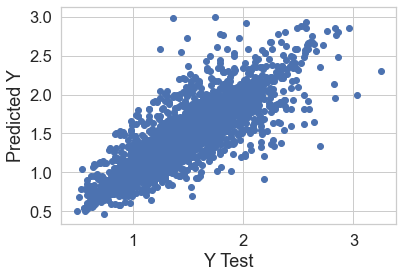

In [49]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# RandomForest Classifier

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.1005254794520548
MSE: 0.02106473035068493
RMSE: 0.14513693654850557


Well as we can see the RMSE is lower than the two previous models, so the RandomForest Regressor is the best model in this case.

# Cross validation Score

In [58]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,X,y,cv=5)
print("Cross validation score of Linear Regression model:",scr.mean())

Cross validation score of Linear Regression model: 0.07279114399109592


In [61]:
from sklearn.model_selection import cross_val_score
scr2=cross_val_score(rf,X,y,cv=5)
print("Cross validation score of Random Forest  model:",scr2.mean())

Cross validation score of Random Forest  model: 0.22389091222852406


In [52]:
import pickle
filename='avocado.pkl'
pickle.dump(rf,open(filename,'wb'))

In [3]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)